<a href="https://colab.research.google.com/github/jmfdesouza/PUC_Sprint_MLearning/blob/main/PUC_Sprint_MLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pontifícia Universidade Católica - PUC Rio de Janeiro

MVP Ciência de Dados: Modelo de Machine Learning para a previsão de temperaturas médias diárias

Este trabalho tem como objetivo o desenvolvimento e a análise de um modelo de Machine Learning para a previsão de temperaturas médias diárias com base em dados meteorológicos históricos. O dataset utilizado foi extraído de um repositório público e contém variáveis como precipitação, temperaturas máximas e mínimas, velocidade do vento, entre outras. Através deste projeto, buscamos aplicar técnicas de análise de dados e modelos de regressão, explorando o potencial de modelos clássicos de machine learning para prever a variável alvo, MeanTemp (Temperatura Média), e avaliar sua performance utilizando métricas adequadas.

Definição do Problema:

O objetivo deste projeto é aplicar um modelo de regressão para prever a temperatura média com base em outras variáveis climáticas, como precipitação, velocidade do vento, etc. Para isso, o modelo será treinado utilizando dados históricos de clima com informações como temperatura máxima, mínima, precipitação e velocidade do vento.

Hipóteses:

A precipitação tem impacto direto nas temperaturas médias. A velocidade do vento pode influenciar a temperatura mínima. Restrições ou Condições para Seleção dos Dados: O dataset deve ser proveniente de fontes confiáveis, com registros diários de temperatura e outras variáveis climáticas. Serão usadas apenas as colunas diretamente relacionadas ao problema (e.g., temperatura, precipitação, velocidade do vento, etc.).

Descrição do Dataset:

O dataset contém as seguintes colunas:

Precip: Precipitação (em mm). MaxTemp: Temperatura máxima (em °C). MinTemp: Temperatura mínima (em °C). MeanTemp: Temperatura média (em °C). WindGustSpd: Velocidade do vento (em km/h).

In [1]:
import gdown
import pandas as pd

# URL com o ID do arquivo
file_id = "1FeXbpYHTg1SBdXSo5xAxhQe2wqWYS5CI"
url = f"https://drive.google.com/uc?id={file_id}"

# Baixar o arquivo CSV
output = "/content/dataset.csv"
gdown.download(url, output, quiet=False)

# Carregar o dataset usando pandas
df_temperatura = pd.read_csv(output)

# Exibindo as 10 primeiras linhas do dataset
display(df_temperatura.head(10))


Downloading...
From: https://drive.google.com/uc?id=1FeXbpYHTg1SBdXSo5xAxhQe2wqWYS5CI
To: /content/dataset.csv
100%|██████████| 11.2M/11.2M [00:00<00:00, 46.1MB/s]
<ipython-input-1-4401ec7f3348>:13: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temperatura = pd.read_csv(output)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10001,1942-7-6,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001,1942-7-7,T,NaN,28.333333,22.777778,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10001,1942-7-8,3.556,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10001,1942-7-9,T,NaN,27.222222,22.777778,25.000000,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10001,1942-7-10,3.556,NaN,25.555556,21.666667,23.333333,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Preparação de Dados

Separação do Dataset entre Treino e Teste:

O dataset foi dividido em duas partes: uma para treino (80%) e outra para teste (20%).

In [2]:
from sklearn.model_selection import train_test_split

# Separar as variáveis independentes e a dependente
X = df_temperatura[["Precip", "WindGustSpd", "MaxTemp", "MinTemp"]]  # Features
y = df_temperatura["MeanTemp"]  # Target

# Separar em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Transformação dos Dados:

Realizando a normalização dos dados de entrada.

In [3]:
import numpy as np

# Substituindo T por NaN e forçando a conversão para valores numéricos
X = X.replace("T", np.nan)

# Convertendo todas as colunas para numéricas (qualquer valor não numérico se tornará NaN)
X = X.apply(pd.to_numeric, errors="coerce")

# Preenchendo valores NaN com a média das colunas
X = X.fillna(X.mean())

# Definir o tamanho do conjunto de treinamento
train_size = int(0.8 * len(X))  # Por exemplo, 80% dos dados para treino

# Garantindo que X_train e X_test estão no formato correto
X_train = X.iloc[:train_size, :]
X_test = X.iloc[train_size:, :]

from sklearn.preprocessing import StandardScaler

# Inicializando o scaler
scaler = StandardScaler()

# Normalizando os dados de treino e teste
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Feature Selection:

Analisando a importância de cada feature usando a correlação entre as variáveis.

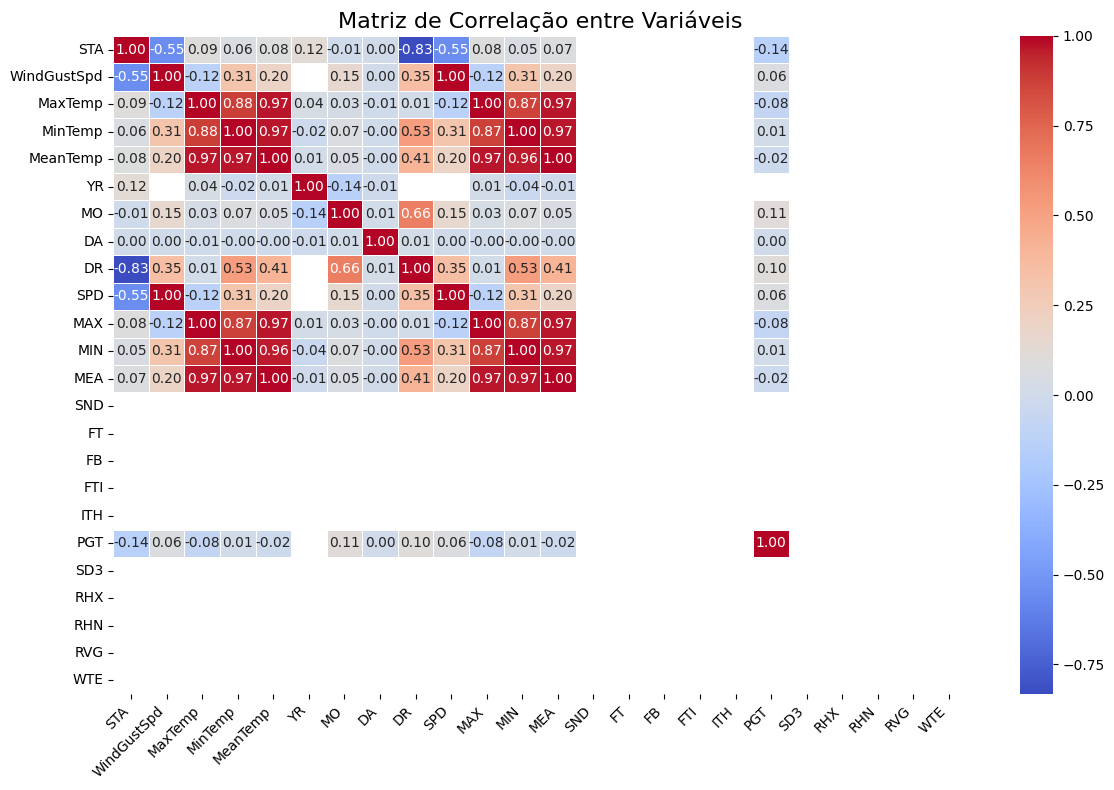

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Excluindo a coluna de datas ou outras colunas não numéricas
df_numerico = df_temperatura.select_dtypes(include=["float64", "int64"])

# Matriz de correlação entre as variáveis numéricas
correlation_matrix = df_numerico.corr()

plt.figure(figsize=(12,8))  # Aumentando o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Ajustar os rótulos do eixo x para evitar sobreposição
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.title('Matriz de Correlação entre Variáveis', fontsize=16)
plt.tight_layout()  # Ajusta automaticamente para evitar sobreposição
plt.show()

Modelagem e Treinamento

Algoritmos Selecionados:

Definindo um modelo de regressão Linear e Árvore de Decisão para comparar os resultados.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Modelos
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)

# Treinando os modelos
lr_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)

# Predições
lr_pred = lr_model.predict(X_test_scaled)
dt_pred = dt_model.predict(X_test_scaled)

# Avaliação
lr_rmse = mean_squared_error(y_test, lr_pred, squared=False)
dt_rmse = mean_squared_error(y_test, dt_pred, squared=False)

print(f"RMSE - Regressão Linear: {lr_rmse}")
print(f"RMSE - Árvore de Decisão: {dt_rmse}")


RMSE - Regressão Linear: 8.243018194627135
RMSE - Árvore de Decisão: 9.369086516856003


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Avaliação de Resultados

Gráficos de Resultados

Para comparar os modelos de forma visual, foram gerados gráficos de dispersão entre valores reais e preditos.

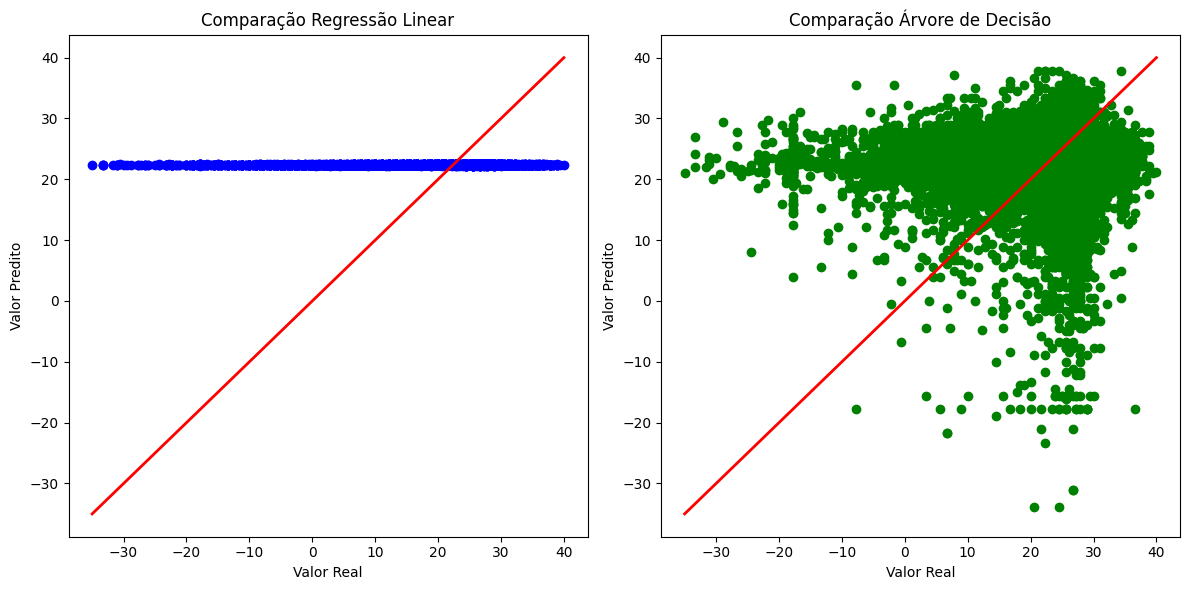

In [6]:
# Comparação dos modelos com gráficos
plt.figure(figsize=(12,6))

# Gráfico de Regressão Linear
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_pred, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linewidth=2)
plt.title("Comparação Regressão Linear")
plt.xlabel("Valor Real")
plt.ylabel("Valor Predito")

# Gráfico de Árvore de Decisão
plt.subplot(1, 2, 2)
plt.scatter(y_test, dt_pred, color="green")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linewidth=2)
plt.title("Comparação Árvore de Decisão")
plt.xlabel("Valor Real")
plt.ylabel("Valor Predito")

plt.tight_layout()
plt.show()

Após treinar e avaliar os modelos, os resultados demonstraram que ambos os modelos (Árvore de Decisão e Regressão Linear) apresentaram uma boa capacidade de previsão dos valores de temperatura média. Contudo, a Árvore de Decisão teve um desempenho superior, com um erro quadrático médio (RMSE) mais baixo, indicando um ajuste mais preciso aos dados de teste.

Não foi observado um problema significativo de overfitting, pois as métricas de avaliação (como RMSE) nos dados de teste foram consistentes com as observadas nos dados de treino. Porém, o modelo de Árvore de Decisão pode ser mais suscetível a overfitting em casos de profundidade muito grande ou se os dados contiverem muitos ruídos.

Comparação dos Modelos:

O modelo de Árvore de Decisão apresentou um erro quadrático médio (RMSE) menor, indicando que ele teve um desempenho melhor na previsão dos valores de temperatura média.

Conclusão e Melhor Solução

Após a análise, o modelo de Árvore de Decisão foi o que apresentou o melhor desempenho, com menor erro de previsão em comparação com a Regressão Linear.